# Customer Churn Prediction using ANN

## Importing nessasary library functions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

# Importing dataset
download_link : https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction

In [2]:
data = pd.read_csv("/content/(1)Churn_Modelling.csv")

In [3]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# EDA

conducting the non-graphical EDA on the dataset in order to know it/ get familiar with it.

In [5]:
data.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [6]:
data.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


From above we now know the number of entries in the dataset along with the mean standard deviation, min and max values along with the essential percentiles  telling us meta about each attributes like symmetry of the dataset, spread, number of null values and possible outliers in the data.

## Conducting Graphical EDA

In [9]:
sns.set_theme()

<ipython-input-10-ef588b861f57>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap = 'RdBu', annot =True, fmt = "0.2%")


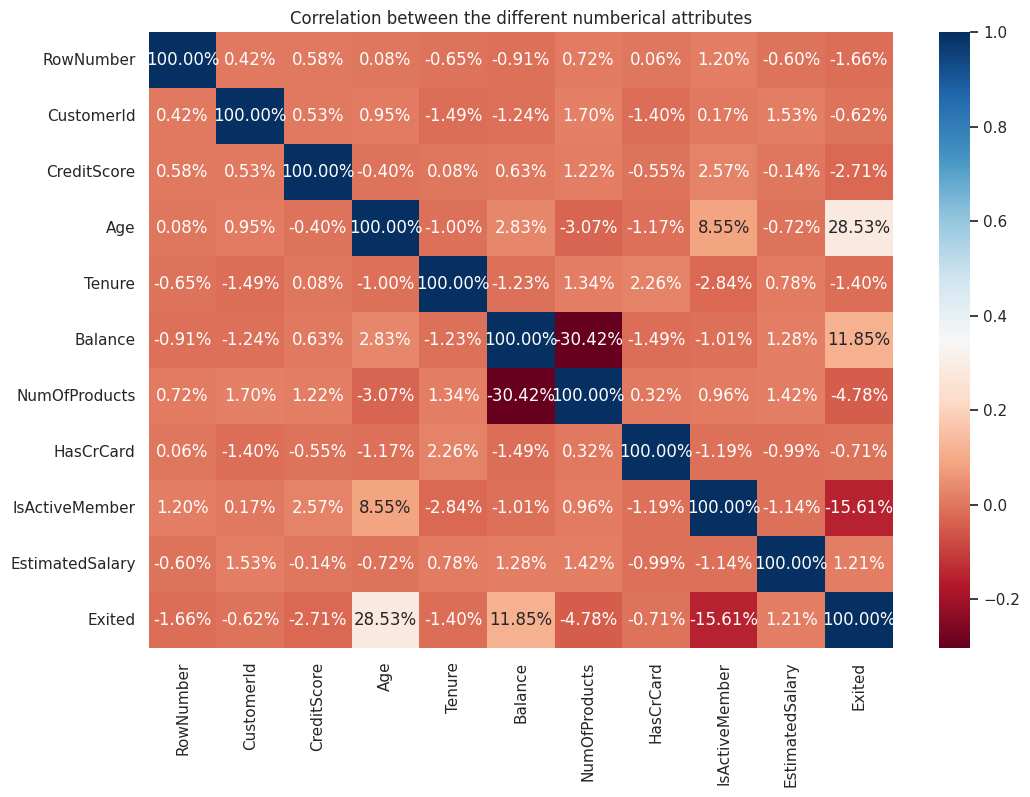

In [10]:
plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(), cmap = 'RdBu', annot =True, fmt = "0.2%")
plt.title("Correlation between the different numberical attributes");

In [ ]:
sns.pairplot(data = data, hue = 'Exited')

In [ ]:
x = data.drop(labels = ['RowNumber', 'CustomerId', 'Exited'], axis = 1)

<Axes: xlabel='NumOfProducts', ylabel='count'>

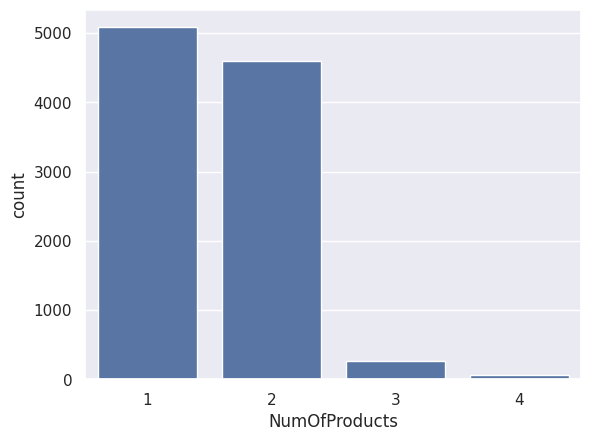

In [ ]:
sns.countplot(data, x = 'NumOfProducts')

<ipython-input-14-969fbd93a0ec>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x = 'Gender', palette = 'colorblind');


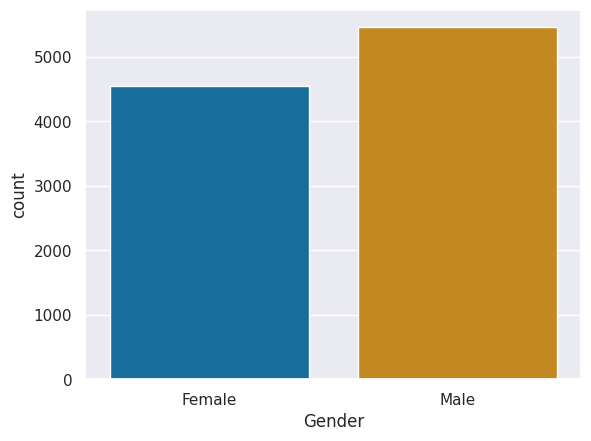

In [ ]:
sns.countplot(data, x = 'Gender', palette = 'colorblind');

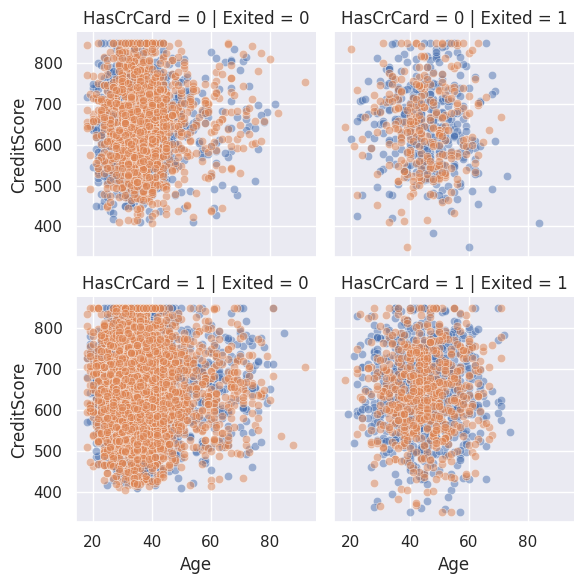

In [ ]:
g = sns.FacetGrid(data, col = 'Exited', row = 'HasCrCard', hue = 'Gender', legend_out = True)
g.map_dataframe(sns.scatterplot, x = 'Age', y = 'CreditScore', alpha = 0.5);

In [ ]:
g = sns.FacetGrid(data, col = 'Gender',row = 'Geography', hue = 'Exited', margin_titles = True , despine = False)
g.map_dataframe(sns.scatterplot, x = 'Balance', y = 'NumOfProducts');

In [ ]:
x = data.drop(labels = ['RowNumber', 'CustomerId', 'Exited'], axis = 1)
y = data.Exited

In [ ]:
x.info()

In [ ]:
ct = make_column_transformer(
    (OneHotEncoder(), [0, 2, 3]),
    (StandardScaler(), [1, 4, 5, 6, 7, 8, 9, 10]),
    remainder = "passthrough"
)
ct.fit(x)

The standardization done for feature selection

In [ ]:
clf = Pipeline([
    ('standardization_and_encoding', make_column_transformer(
    (OneHotEncoder(), [0, 2, 3]),
    (StandardScaler(), [1, 4, 5, 6, 7, 8, 9, 10]),
    remainder = "passthrough"
)),
    ('model', DecisionTreeClassifier())
])

In [ ]:
clf.fit(x, y)

In [ ]:
plt.figure(figsize = (10, 5))
plot_tree(clf.named_steps['model'], class_names = x.columns, filled = True, max_depth = 2);

## Results of the Graphical Analysis
 * The dataset contains no null values.
 * The dataset have 3 object/ string valued attributes.
 * Columns named: Age, IsActiveMember, Balance, NumOfProducts affect the target column i.e. Exited.
 * Columns: Surname and credit score are also the most important features fromthe dataset as seen from the decision tree.
 * The column Age show correlation with the columns IsActiveMember and Balance.
 * Similarly the column IsActiveMember

# Making multiple ANN's with different optimizers

In [ ]:
x.info(), y.info()

In [ ]:
ct = make_column_transformer(
    (OrdinalEncoder(), [0]),
    (OneHotEncoder(), [2, 3]),
    (StandardScaler(), [1, 4, 5, 6, 7, 8, 9, 10]),
    remainder = "passthrough"
)
x_trans = ct.fit_transform(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_trans, y, test_size = 0.20)#, random_state = 42)

In [ ]:
X_train

In [ ]:
data.Surname.unique()

In [ ]:
# tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
   tf.keras.layers.Dense(32, activation = 'relu', name = 'input_layer'),
   tf.keras.layers.Dense(16, activation = 'relu', name = 'hidden_layer_1'),
   tf.keras.layers.Dense(8, activation = 'relu', name = 'hidden_layer_2'),
   tf.keras.layers.Dense(1, activation = 'sigmoid', name = "output_layer")
], name = "DNN_with_SGD_as_optimizer")
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['accuracy'])
history_1 = model_1.fit(X_train, y_train, epochs = 5, validation_data = [X_test, y_test], use_multiprocessing = True, verbose = 1)

In [ ]:
model_1.summary()

In [ ]:
print(f"The loss the model_1: {model_1.evaluate(X_test, y_test, verbose = 0)[0]*100}\nThe testing accuracy of the model_1: {model_1.evaluate(X_test, y_test, verbose = 0)[1]*100}%")

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
   tf.keras.layers.Dense(13, activation = 'relu', name = 'input_layer'),
   tf.keras.layers.Dense(32, activation = 'relu', name = 'hidden_layer_1'),
   tf.keras.layers.Dense(64, activation = 'relu', name = 'hidden_layer_2'),
   tf.keras.layers.Dense(1, activation = 'sigmoid', name = "output_layer")
], name = "DNN_with_Adagrad_as_optimizer")
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adagrad(),
              metrics = ['accuracy'])
history_2 = model_2.fit(X_train, y_train, epochs = 5, validation_data = [X_test, y_test], use_multiprocessing = True, verbose = 1)

In [ ]:
model_2.summary()

In [ ]:
print(f"The loss the model_2: {model_2.evaluate(X_test, y_test, verbose = 0)[0]*100}\nThe testing accuracy of the model_2: {model_2.evaluate(X_test, y_test, verbose = 0)[1]*100}%")

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
   tf.keras.layers.Dense(13, activation = 'relu', name = 'input_layer'),
   tf.keras.layers.Dense(32, activation = 'relu', name = 'hidden_layer_1'),
   tf.keras.layers.Dense(64, activation = 'relu', name = 'hidden_layer_2'),
   tf.keras.layers.Dense(1, activation = 'sigmoid', name = "output_layer")
], name = "DNN_with_Adadelta_as_optimizer")
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adadelta(name = 'Adadelta'),
              metrics = ['accuracy'])
history_3 = model_3.fit(X_train, y_train, epochs = 5, validation_data = [X_test, y_test], use_multiprocessing = True, verbose = 1)

In [ ]:
model_3.summary()

In [ ]:
print(f"The loss the model_3: {model_3.evaluate(X_test, y_test, verbose = 0)[0]*100}\nThe testing accuracy of the model_3: {model_3.evaluate(X_test, y_test, verbose = 0)[1]*100}%")

In [ ]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
   tf.keras.layers.Dense(13, activation = 'relu', name = 'input_layer'),
   tf.keras.layers.Dense(32, activation = 'relu', name = 'hidden_layer_1'),
   tf.keras.layers.Dense(64, activation = 'relu', name = 'hidden_layer_2'),
   tf.keras.layers.Dense(1, activation = 'sigmoid', name = "output_layer")
], name = "DNN_with_RMSprop_as_optimizer")
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.RMSprop(),
              metrics = ['accuracy'])
history_4 = model_4.fit(X_train, y_train, epochs = 5, validation_data = [X_test, y_test], use_multiprocessing = True, verbose = 1)

In [ ]:
model_4.summary()

In [ ]:
print(f"The loss the model_4: {model_4.evaluate(X_test, y_test, verbose = 0)[0]*100}\nThe testing accuracy of the model_4: {model_4.evaluate(X_test, y_test, verbose = 0)[1]*100}%")

In [ ]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
   tf.keras.layers.Dense(13, activation = 'relu', name = 'input_layer'),
   tf.keras.layers.Dense(32, activation = 'relu', name = 'hidden_layer_1'),
   tf.keras.layers.Dense(64, activation = 'relu', name = 'hidden_layer_2'),
   tf.keras.layers.Dense(1, activation = 'sigmoid', name = "output_layer")
], name = "DNN_with_AdamW_as_optimizer")
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.AdamW(),
              metrics = ['accuracy'])
history_5 = model_5.fit(X_train, y_train, epochs = 5, validation_data = [X_test, y_test], use_multiprocessing = True, verbose = 1)

In [ ]:
model_5.summary()

In [ ]:
print(f"The loss the model_5: {model_5.evaluate(X_test, y_test, verbose = 0)[0]*100}\nThe testing accuracy of the model_5: {model_5.evaluate(X_test, y_test, verbose = 0)[1]*100}%")

In [ ]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
   tf.keras.layers.Dense(13, activation = 'relu', name = 'input_layer'),
   tf.keras.layers.Dense(32, activation = 'relu', name = 'hidden_layer_1'),
   tf.keras.layers.Dense(64, activation = 'relu', name = 'hidden_layer_2'),
   tf.keras.layers.Dense(1, activation = 'sigmoid', name = "output_layer")
], name = "DNN_with_Adam_as_optimizer")
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])
history_6 = model_6.fit(X_train, y_train, epochs = 5, validation_data = [X_test, y_test], use_multiprocessing = True, verbose = 1)

In [ ]:
model_6.summary()

In [ ]:
print(f"The loss the model_6: {model_6.evaluate(X_test, y_test, verbose = 0)[0]*100}\nThe testing accuracy of the model_6: {model_6.evaluate(X_test, y_test, verbose = 0)[1]*100}%")

## Model evaluation and comparison of different optimizers

In [ ]:
loss = []
loss.append(model_1.evaluate(X_test, y_test, verbose = 0)[0])
loss.append(model_2.evaluate(X_test, y_test, verbose = 0)[0])
loss.append(model_3.evaluate(X_test, y_test, verbose = 0)[0])
loss.append(model_4.evaluate(X_test, y_test, verbose = 0)[0])
loss.append(model_5.evaluate(X_test, y_test, verbose = 0)[0])
loss.append(model_6.evaluate(X_test, y_test, verbose = 0)[0])

In [ ]:
loss

In [ ]:
accuracy = []
accuracy.append(model_1.evaluate(X_test, y_test, verbose = 0)[1]*100)
accuracy.append(model_2.evaluate(X_test, y_test, verbose = 0)[1]*100)
accuracy.append(model_3.evaluate(X_test, y_test, verbose = 0)[1]*100)
accuracy.append(model_4.evaluate(X_test, y_test, verbose = 0)[1]*100)
accuracy.append(model_5.evaluate(X_test, y_test, verbose = 0)[1]*100)
accuracy.append(model_6.evaluate(X_test, y_test, verbose = 0)[1]*100)

In [ ]:
accuracy

[79.40000295639038,
 78.85000109672546,
 79.40000295639038,
 79.50000166893005,
 79.90000247955322,
 79.6999990940094]

In [ ]:
y = np.arange(0, 101, 10)

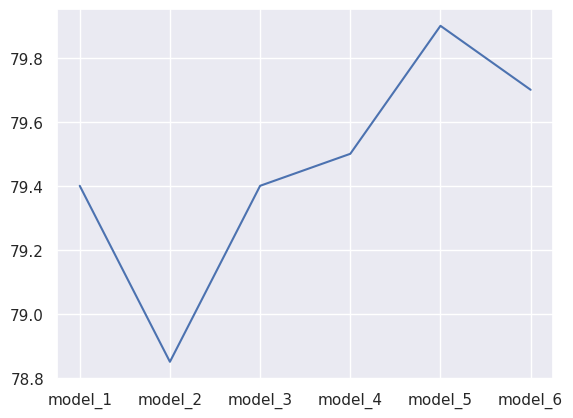

In [ ]:
models = ['model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6']
plt.plot(models, accuracy)

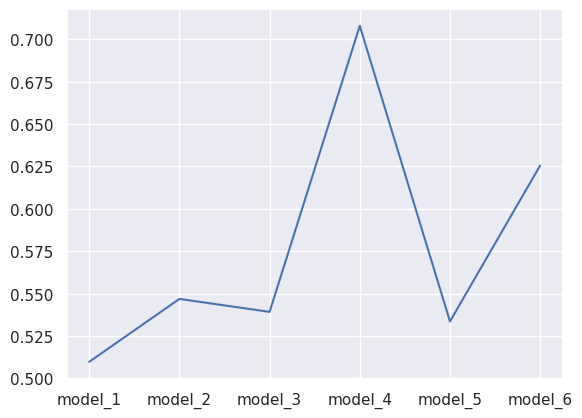

In [ ]:
plt.plot(models, loss)

In [ ]:
def neural_network():
  for epochs in range(3-3):
    x1 = int(input("enter the 1st input: "))
    w1 = int(input("enter the 1st weight: "))
    x2 = int(input("enter the 2nd input: "))
    w2 = int(input("enter the 2nd weight: "))
    x3 = int(input("enter the 3rd input: "))
    w3 = int(input("enter the 3rd weight: "))
    x4 = int(input("enter the 4th input: "))
    w4 = int(input("enter the 4th weight: "))
    alpha = int(input("enter the value alpha: "))
    target = int(input("enter the target value: "))
    bias = int(input("enter the value of bias: "))
    y_input = int(0)
    del_bias = alpha*target
    del_w1 = alpha*target*x1
    del_w2 = alpha*target*x2
    del_w3 = alpha*target*x3
    del_w4 = alpha*target*x4
    w1 = del_w1+w1
    w2 = del_w2+w2
    w3 = del_w3+w3
    w4 = del_w4+w4
    y_input = bias+(w1*x1)+(w2*x2)+(w3*x3)+(w4*x4)
    print("y_output: ")
    if y_input > 0:
      print(1),
    elif y_input == 0:
      print(0)
    else:
      print(-1),
neural_network()